### Import libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import math

import statsmodels.api as sm
import statsmodels.tsa.api as smt

from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
#Machine learning models on the transformed data after Preprocessing


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
main_data = pd.read_csv("/content/drive/My Drive/Rainfall prediction/final_data.csv",parse_dates=True)


In [ ]:
main_data.head()

,Date,Andaman & Nicobar Islands,Arunachal Pradesh,Assam & Meghalaya,Bihar,Chhattisgarh,Coastal Andhra Pradesh,Coastal Karnataka,East Madhya Pradesh,East Rajasthan,East Uttar Pradesh,Gangetic West Bengal,Gujarat Region,Haryana Delhi & Chandigarh,Himachal Pradesh,Jammu & Kashmir,Jharkhand,Kerala,Konkan & Goa,Lakshadweep,Madhya Maharashtra,Matathwada,Naga Mani Mizo Tripura,North Interior Karnataka,Orissa,Punjab,Rayalseema,Saurashtra & Kutch,South Interior Karnataka,Sub Himalayan West Bengal & Sikkim,Tamil Nadu,Telangana,Uttarakhand,Vidarbha,West Madhya Pradesh,West Rajasthan,West Uttar Pradesh
0,1901-01-01,49.2,NaN,27.1,51.8,48.9,18.8,1.8,48.5,21.6,62.6,37.1,4.2,35.4,137.8,66.4,92.7,28.7,5.6,22.6,18.8,15.8,11.7,3.5,39.5,55.7,7.0,1.9,4.9,26.5,24.5,6.9,134.5,36.8,25.8,6.7,51.4
1,1901-02-01,87.1,NaN,19.5,19.6,116.5,80.9,0.6,38.1,8.9,31.3,58.4,0.0,28.9,174.5,69.3,66.6,44.7,0.1,86.4,0.6,3.3,18.1,18.8,65.1,50.1,50.2,0.0,31.8,14.8,39.1,41.8,81.4,39.9,5.8,0.0,25.6
2,1901-03-01,29.2,NaN,30.6,11.9,27.8,7.2,10.7,15.7,2.9,8.2,3.9,0.6,11.1,75.0,69.6,11.1,51.6,0.4,114.8,7.7,32.1,29.4,7.1,16.1,25.2,0.0,0.1,3.0,14.1,21.7,7.8,44.5,30.9,5.8,1.1,9.5
3,1901-04-01,2.3,NaN,223.0,1.1,5.5,28.7,52.4,10.7,0.7,1.1,64.1,1.6,0.0,19.2,132.2,18.4,160.0,35.7,263.8,36.6,48.5,206.2,67.2,51.6,2.1,12.1,0.2,32.7,29.2,36.0,45.2,5.9,26.1,2.8,0.0,0.7
4,1901-05-01,528.8,NaN,207.0,65.6,18.4,68.7,81.6,6.2,5.0,13.6,121.7,7.0,5.1,89.6,105.8,33.5,174.7,19.9,37.3,30.4,26.5,124.0,65.5,79.0,25.2,38.9,3.2,109.6,195.5,74.0,22.0,60.8,7.3,2.1,6.1,5.6


In [ ]:
main_data = main_data.drop(['Andaman & Nicobar Islands','Arunachal Pradesh','Lakshadweep'],axis=1)
#main_data.isnull().sum()
#main_data = main_data.reset_index()
main_data = main_data.fillna(main_data.mean(),axis=0)

In [ ]:
main_data

,Date,Assam & Meghalaya,Bihar,Chhattisgarh,Coastal Andhra Pradesh,Coastal Karnataka,East Madhya Pradesh,East Rajasthan,East Uttar Pradesh,Gangetic West Bengal,Gujarat Region,Haryana Delhi & Chandigarh,Himachal Pradesh,Jammu & Kashmir,Jharkhand,Kerala,Konkan & Goa,Madhya Maharashtra,Matathwada,Naga Mani Mizo Tripura,North Interior Karnataka,Orissa,Punjab,Rayalseema,Saurashtra & Kutch,South Interior Karnataka,Sub Himalayan West Bengal & Sikkim,Tamil Nadu,Telangana,Uttarakhand,Vidarbha,West Madhya Pradesh,West Rajasthan,West Uttar Pradesh
0,1901-01-01,27.1,51.8,48.9,18.8,1.8,48.5,21.6,62.6,37.1,4.2,35.4,137.8,66.4,92.7,28.7,5.6,18.8,15.8,11.7,3.5,39.5,55.7,7.0,1.9,4.9,26.5,24.5,6.9,134.5,36.8,25.8,6.7,51.4
1,1901-02-01,19.5,19.6,116.5,80.9,0.6,38.1,8.9,31.3,58.4,0.0,28.9,174.5,69.3,66.6,44.7,0.1,0.6,3.3,18.1,18.8,65.1,50.1,50.2,0.0,31.8,14.8,39.1,41.8,81.4,39.9,5.8,0.0,25.6
2,1901-03-01,30.6,11.9,27.8,7.2,10.7,15.7,2.9,8.2,3.9,0.6,11.1,75.0,69.6,11.1,51.6,0.4,7.7,32.1,29.4,7.1,16.1,25.2,0.0,0.1,3.0,14.1,21.7,7.8,44.5,30.9,5.8,1.1,9.5
3,1901-04-01,223.0,1.1,5.5,28.7,52.4,10.7,0.7,1.1,64.1,1.6,0.0,19.2,132.2,18.4,160.0,35.7,36.6,48.5,206.2,67.2,51.6,2.1,12.1,0.2,32.7,29.2,36.0,45.2,5.9,26.1,2.8,0.0,0.7
4,1901-05-01,207.0,65.6,18.4,68.7,81.6,6.2,5.0,13.6,121.7,7.0,5.1,89.6,105.8,33.5,174.7,19.9,30.4,26.5,124.0,65.5,79.0,25.2,38.9,3.2,109.6,195.5,74.0,22.0,60.8,7.3,2.1,6.1,5.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1399,2017-08-01,483.1,342.8,300.4,224.2,625.2,179.1,137.3,185.1,264.5,179.7,76.5,273.1,161.4,246.0,462.6,731.2,192.0,230.4,543.3,105.8,301.7,122.2,171.6,153.5,181.4,777.9,159.4,204.2,349.0,198.3,173.7,43.1,129.8
1400,2017-09-01,345.4,129.6,177.7,141.8,316.5,144.0,46.4,85.2,191.4,67.2,92.5,103.4,43.3,134.0,435.5,546.9,190.1,146.9,352.2,206.6,192.2,62.7,194.6,41.8,250.3,390.1,165.3,115.3,213.4,133.3,151.4,21.2,140.7
1401,2017-10-01,212.1,50.1,61.6,123.0,185.7,18.8,0.0,3.0,225.2,15.5,0.0,0.3,0.3,103.4,228.0,156.9,112.8,100.4,287.6,147.9,161.1,0.0,221.1,4.8,178.3,166.5,155.5,114.6,2.8,57.5,13.5,0.0,0.6
1402,2017-11-01,10.3,0.0,0.2,46.7,19.4,0.7,0.4,0.0,21.9,0.0,1.8,6.9,11.3,2.3,152.1,0.7,5.0,2.4,7.6,4.9,30.0,5.2,33.3,0.0,13.8,3.8,141.5,1.9,0.2,0.3,0.4,0.6,0.0


In [ ]:
main_data.columns

Index(['Date', 'Assam & Meghalaya', 'Bihar', 'Chhattisgarh',
       'Coastal Andhra Pradesh', 'Coastal Karnataka', 'East Madhya Pradesh',
       'East Rajasthan', 'East Uttar Pradesh', 'Gangetic West Bengal',
       'Gujarat Region', 'Haryana Delhi & Chandigarh', 'Himachal Pradesh',
       'Jammu & Kashmir', 'Jharkhand', 'Kerala', 'Konkan & Goa',
       'Madhya Maharashtra', 'Matathwada', 'Naga Mani Mizo Tripura',
       'North Interior Karnataka', 'Orissa', 'Punjab', 'Rayalseema',
       'Saurashtra & Kutch', 'South Interior Karnataka',
       'Sub Himalayan West Bengal & Sikkim', 'Tamil Nadu', 'Telangana',
       'Uttarakhand', 'Vidarbha', 'West Madhya Pradesh', 'West Rajasthan',
       'West Uttar Pradesh'],
      dtype='object')

In [ ]:
rainfall_data = pd.DataFrame(main_data['Coastal Karnataka'])
rainfall_data.set_index(main_data['Date'],inplace=True)

rainfall_data.head()

,Coastal Karnataka
Date,
1901-01-01,1.8
1901-02-01,0.6
1901-03-01,10.7
1901-04-01,52.4
1901-05-01,81.6


In [ ]:
test_rainfall_data = rainfall_data.ix['2010': '2017']
train_rainfall_data = rainfall_data.ix['1917': '2010']
train_rainfall_data

,Coastal Karnataka
Date,
1917-01-01,0.0
1917-02-01,29.8
1917-03-01,7.1
1917-04-01,10.2
1917-05-01,52.6
...,...
2009-08-01,486.1
2009-09-01,530.7
2009-10-01,287.4


In [ ]:
test_rainfall_data

,Coastal Karnataka
Date,
2010-01-01,14.4
2010-02-01,0.4
2010-03-01,3.5
2010-04-01,62.2
2010-05-01,80.2
...,...
2016-08-01,471.3
2016-09-01,225.9
2016-10-01,77.4


In [ ]:
train_rainfall_data.index.values

array(['1917-01-01', '1917-02-01', '1917-03-01', ..., '2009-10-01',
       '2009-11-01', '2009-12-01'], dtype=object)

Text(0.5, 1.0, 'Monthly mean Precipitation(mm) across years')

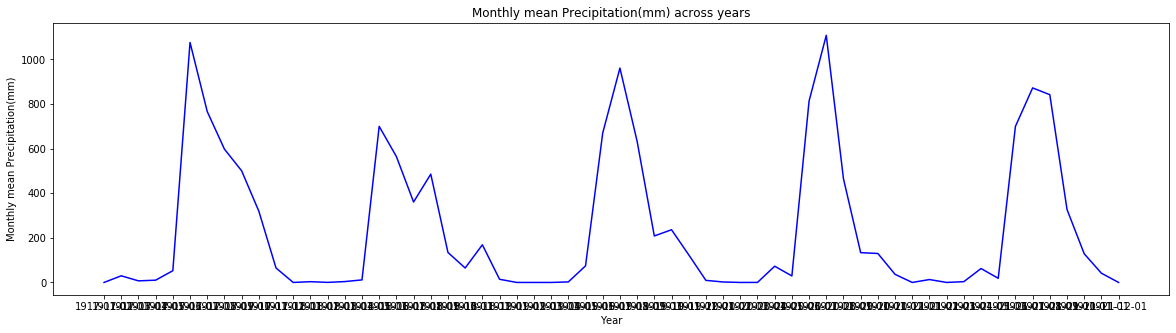

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(train_rainfall_data.ix[:60], color='blue')
plt.xlabel('Year')
plt.ylabel('Monthly mean Precipitation(mm)')
plt.title('Monthly mean Precipitation(mm) across years')

### 4- Months Moving Average

Text(0.5, 1.0, '4 Months Moving Average')

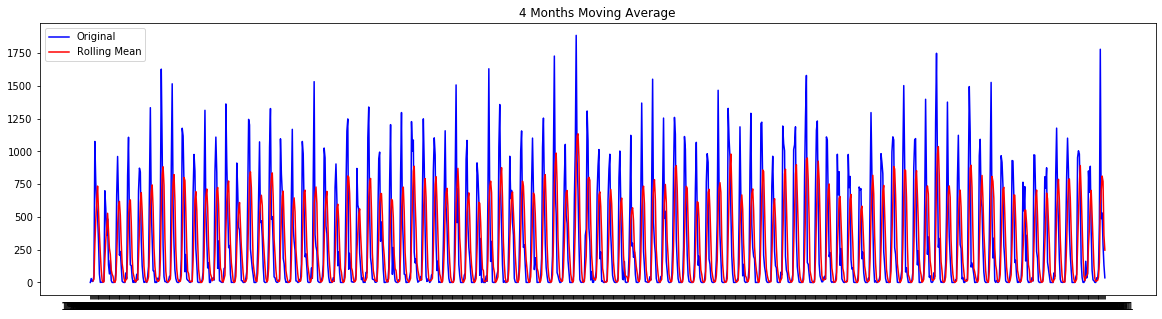

In [ ]:
plt.figure(figsize=(20,5))
four_months_moving_average = train_rainfall_data.rolling(window=4).mean()
plt.plot(train_rainfall_data, color='blue', label='Original')
plt.plot(four_months_moving_average, color='red', label='Rolling Mean')
plt.legend(loc='best')
plt.title('4 Months Moving Average')

### 6-Months Moving Average

Text(0.5, 1.0, '6 Months Moving Average')

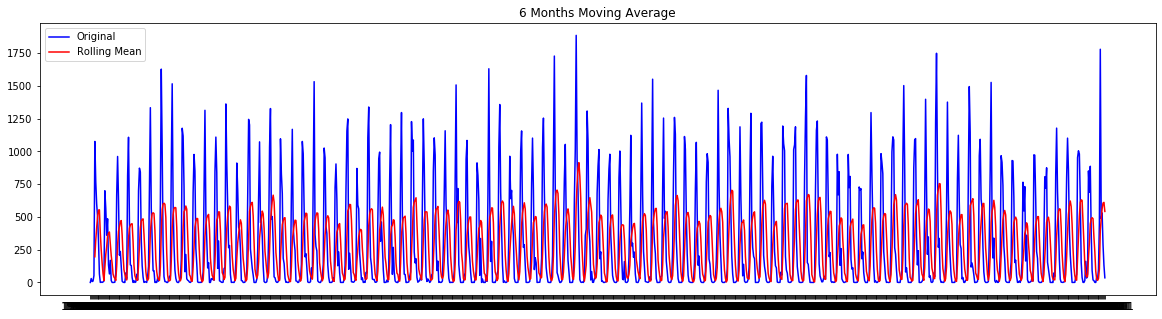

In [ ]:
plt.figure(figsize=(20,5))
six_months_moving_average = train_rainfall_data.rolling(window=6).mean()
plt.plot(train_rainfall_data, color='blue', label='Original')
plt.plot(six_months_moving_average, color='red', label='Rolling Mean')
plt.legend(loc='best')
plt.title('6 Months Moving Average')

### 8-Months Moving Average

Text(0.5, 1.0, '8 Months Moving Average')

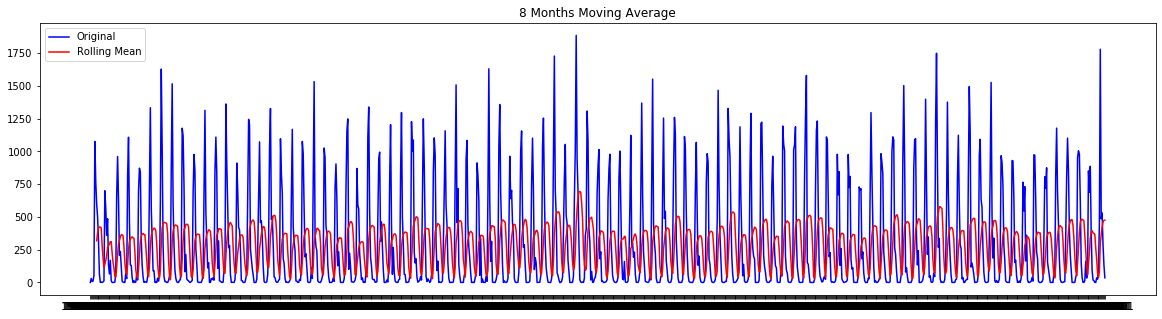

In [ ]:
plt.figure(figsize=(20,5))
eight_months_moving_average = train_rainfall_data.rolling(window=8).mean()
plt.plot(train_rainfall_data, color='blue', label='Original')
plt.plot(eight_months_moving_average, color='red', label='Rolling Mean')
plt.legend(loc='best')
plt.title('8 Months Moving Average')

### 12-Months Moving Average

Text(0.5, 1.0, '12 Months Moving Average')

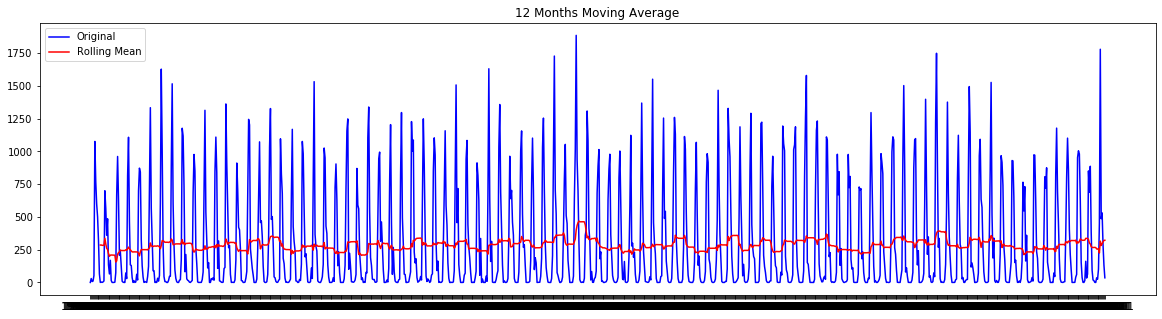

In [ ]:
plt.figure(figsize=(20,5))
twelve_months_moving_average = train_rainfall_data.rolling(window=12).mean()
plt.plot(train_rainfall_data, color='blue', label='Original')
plt.plot(twelve_months_moving_average, color='red', label='Rolling Mean')
plt.legend(loc='best')
plt.title('12 Months Moving Average')

### Analysis of above plots
- As we could see in the above plots, 12-month moving average could produce a wrinkle free curve when compared to other moving averages.
- Therefore, s=12.

- This is to find the period of seasonality.

### ACF and PACF plots

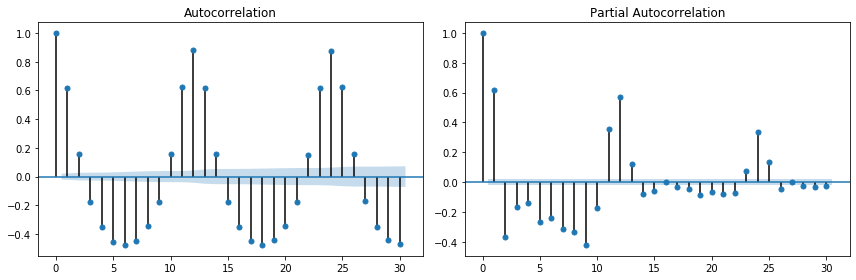

In [ ]:
fig, axes = plt.subplots(1, 2, sharey=False, sharex=False)
fig.set_figwidth(12)
fig.set_figheight(4)
smt.graphics.plot_acf(train_rainfall_data, lags=30, ax=axes[0], alpha=0.5)
smt.graphics.plot_pacf(train_rainfall_data, lags=30, ax=axes[1], alpha=0.5)
plt.tight_layout()

- As we could see, there is seasonality effect.

In [ ]:
#AR model
from statsmodels.tsa.ar_model import AR
import matplotlib.pyplot as plt
from math import sqrt
from sklearn.metrics import mean_squared_error,r2_score

y = main_data['Coastal Karnataka']
y_train = y[1008:1378]
y_test = y[1378:]



In [ ]:
# train autoregression
model = AR(y_train)
model_fit = model.fit()


In [ ]:
# make predictions
predictions = model_fit.predict(start=len(y_train), 
                                end=len(y_train)+len(y_test)-1, 
                                dynamic=False)
    
error = mean_squared_error(y_test, predictions)
print('Test RMSE: %.3f' % sqrt(error))
print('r2 score: %.3f' %r2_score(y_test, predictions))

Test RMSE: 102.999
r2 score: 0.888


In [ ]:
predictions

1378     72.535414
1379     43.343852
1380     13.848695
1381     63.718764
1382     64.124842
1383     78.724523
1384    278.062930
1385    717.242853
1386    884.922851
1387    632.854630
1388    308.667770
1389    193.383587
1390    115.066554
1391     51.907045
1392     39.816840
1393     82.544301
1394     70.711719
1395    100.154677
1396    323.804296
1397    698.057236
1398    845.735793
1399    638.488068
1400    338.179818
1401    188.394822
1402    116.387268
1403     62.137720
dtype: float64

In [ ]:
test_rainfall_data

,Coastal Karnataka
Date,
2010-01-01,14.4
2010-02-01,0.4
2010-03-01,3.5
2010-04-01,62.2
2010-05-01,80.2
...,...
2016-08-01,471.3
2016-09-01,225.9
2016-10-01,77.4


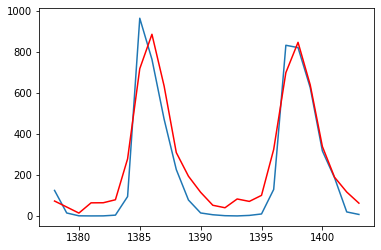

In [ ]:
# plot results
plt.plot(y_test)
plt.plot(predictions, color='red')
plt.show()

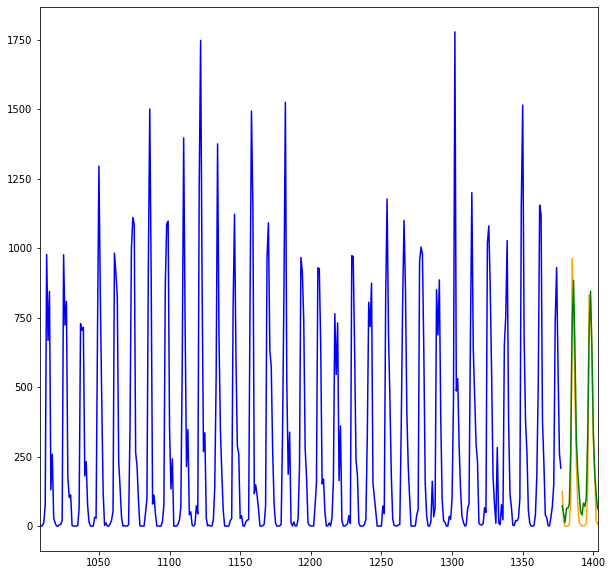

In [ ]:
# plot
plt.figure(figsize=(10,10))
y_train.plot(color="blue")
y_test.plot(color="orange")
predictions.plot(color="green")

In [ ]:
#ARIMA

In [ ]:
!pip install -q pmdarima
from pmdarima import auto_arima
model = auto_arima(y_train, trace=True, error_action='ignore', 
                   suppress_warnings=True)
model.fit(y_train)

forecast = model.predict(n_periods=len(y_test))
forecast = pd.DataFrame(forecast,index = y_test.index,
                        columns=['Prediction'])



Fit ARIMA: order=(2, 0, 2) seasonal_order=(0, 0, 0, 1); AIC=5167.927, BIC=5191.408, Fit time=0.770 seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=5485.666, BIC=5493.493, Fit time=0.019 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=5301.793, BIC=5313.534, Fit time=0.051 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=5313.526, BIC=5325.266, Fit time=0.255 seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=5643.977, BIC=5647.891, Fit time=0.012 seconds
Fit ARIMA: order=(1, 0, 2) seasonal_order=(0, 0, 0, 1); AIC=5261.797, BIC=5281.364, Fit time=0.556 seconds
Fit ARIMA: order=(2, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=5170.982, BIC=5190.550, Fit time=0.737 seconds
Fit ARIMA: order=(3, 0, 2) seasonal_order=(0, 0, 0, 1); AIC=5180.343, BIC=5207.737, Fit time=1.070 seconds
Near non-invertible roots for order (3, 0, 2)(0, 0, 0, 1); setting score to inf (at least one inverse root too close to the border of the unit c

In [ ]:
print('Test RMSE: %.3f' % sqrt(mean_squared_error(y_test, forecast)))
print('r2 score : %.3f' %r2_score(y_test, forecast))

Test RMSE: 292.935
r2 score : 0.096


In [ ]:
forecast

,Prediction
1378,98.928578
1379,77.731029
1380,124.706295
1381,213.172021
1382,309.271129
1383,383.287400
1384,417.608041
1385,409.622845
1386,369.662089
1387,315.515810


In [ ]:
y_test

1378    124.2
1379     14.3
1380      0.5
1381      0.0
1382      0.2
1383      3.8
1384     94.3
1385    963.1
1386    763.1
1387    471.3
1388    225.9
1389     77.4
1390     14.4
1391      5.7
1392      1.1
1393      0.0
1394      2.5
1395      9.5
1396    129.0
1397    831.4
1398    820.1
1399    625.2
1400    316.5
1401    185.7
1402     19.4
1403      7.2
Name: Coastal Karnataka, dtype: float64

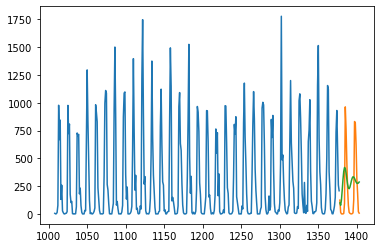

In [ ]:
#plot the predictions for validation set
plt.plot(y_train, label='Train')
plt.plot(y_test, label='Valid')
plt.plot(forecast, label='Prediction')
plt.show()

To predict rainfall for next year i.e., 2018 considering training data till 2017

In [ ]:
from statsmodels.tsa.ar_model import AR
import matplotlib.pyplot as plt
from math import sqrt
from sklearn.metrics import mean_squared_error,r2_score
next_yr_data = rainfall_data['Coastal Karnataka']
model = AR(next_yr_data)
model_fit = model.fit()
pred = model_fit.predict(start=len(next_yr_data), 
                                end=len(next_yr_data)+12-1, 
                                dynamic=False)
    
pred = pd.DataFrame(pred,columns=['Prediction'])
pred

,Prediction
2018-01-01,43.793180
2018-02-01,73.997241
2018-03-01,64.545081
2018-04-01,15.282123
2018-05-01,312.649771
2018-06-01,773.303245
2018-07-01,852.429466
2018-08-01,636.490829
2018-09-01,356.175573
2018-10-01,194.080566
